In [307]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 

In [308]:
df=pd.read_csv('Final_Dataset.csv',sep=' ')
#df=df.drop('Unnamed: 0', axis=1)
df.head()

,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
0,0,3,3,2,12.0,0.0,0.0,0.0,0.0,0.0,...,20676.000000,21980.000000,24681.0,0.1992,0.8608,0.54012,0.461533,0.27298,0.4633,0.0141
1,0,2,2,1,41.0,0.0,1.0,0.0,0.0,0.0,...,21999.500000,24233.000000,24231.0,0.6050,0.6538,0.54440,0.230767,0.20630,0.3058,0.3604
2,0,2,3,2,32.0,1.0,0.0,0.0,0.0,0.0,...,23323.000000,26486.000000,23781.0,0.9048,0.4468,0.54860,0.000000,0.25940,0.9249,0.1294
3,0,3,4,3,12.0,0.0,0.0,0.0,0.0,0.0,...,23408.000000,27628.000000,23331.0,0.6922,0.4400,0.55280,0.125000,0.31250,0.7304,0.6109
4,0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,23832.666667,26274.333333,22881.0,0.4928,0.4823,0.55700,0.250000,0.36560,0.2128,0.2896


## Introducing a New column 'Diversity'

In [279]:
df['Diversity'] = 1 - df['UGDS_WHITE'].values

In [280]:
Predictor = df['Diversity']
Label=df['RET_FT4'].values

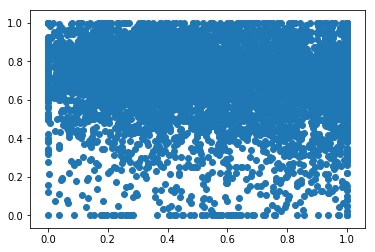

In [281]:
plt.scatter(x=Predictor,y=Label)

## Testing the Correlation between 'Diversity'(Predictor or Independent Variable) and RET_FT4(Retention Rate for 4 Year program)

#### Null Hypothesis: No Relationshp exists between the two variables or in other words Slope is 0

In [282]:
from scipy.stats import linregress
linregress(Predictor, Label)

LinregressResult(slope=-0.06237291171952125, intercept=0.7142149114690657, rvalue=-0.0930264760507331, pvalue=4.776314943149848e-16, stderr=0.007667236263291801)

##### Since p-value is lesser than 0.05, we reject the Hypothesis
##### We can clearly observe that there is a linear relaionship between the independent and dependent variables: 'Diversity'(Predictor or Independent Variable) and RET_FT4(Retention Rate for 4 Year program)

## Tweaking 'NPT4_PUB' and 'NPT4_PRIV' columns to ensure uniformity in feature engineering process

In [309]:
x=df['NPT4_PUB'].values
y=df['NPT4_PRIV'].values
Label=df['RET_FT4'].values

In [310]:
df['AvgPriceIndicator']= x/y

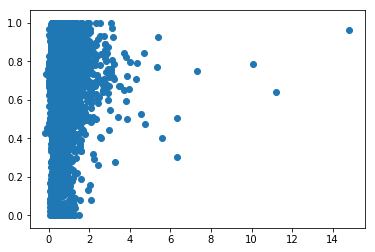

In [311]:
a= df['AvgPriceIndicator'].values

x=a
y=Label

plt.scatter(x=a,y=Label)

# Testing colinearity with Label column

## Testing the Correlation between AvgPriceIndicator(Predictor or Independent Variable) and RET_FT4(Retention Rate for 4 Year program)¶

##### Null Hypothesis: No Relationshp exists between the two variables or in other words Slope is 0.

In [312]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=0.01511170770828366, intercept=0.674722481458308, rvalue=0.04074778831656723, pvalue=0.00038636875372366687, stderr=0.004255841136482229)

##### Since p-value is lesser than 0.05, we reject the Hypothesis

##### We can clearly observe that there is a linear relaionship between the independent and dependent variables: AvgPriceIndicator(Predictor or Independent Variable) and RET_FT4(Retention Rate for 4 Year program)

In [313]:
features=df[['HCM2','SAT_AVG_ALL','UGDS','PPTUG_EF','CURROPER','AvgPriceIndicator','PCTPELL','PCTFLOAN','UG25ABV','ACTCMMID','CONTROL','RELAFFIL']]
target=df[['RET_FT4']]

In [314]:
# Compute the correlation matrix
corr = features.corr()

In [315]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

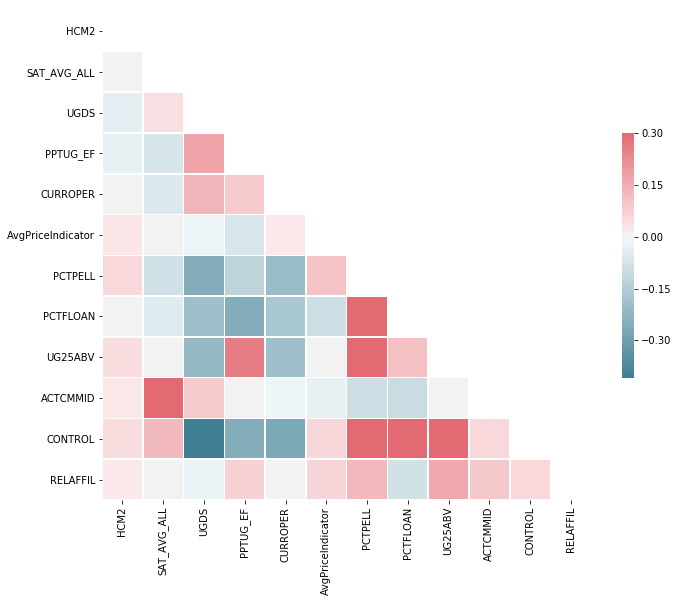

In [316]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [317]:
# Dropping PCTPELL ,ACTCMMID, CONTROL, UG25ABV
features=df[['HCM2','SAT_AVG_ALL','UGDS','PPTUG_EF','CURROPER','NPT4_PUB','NPT4_PRIV','PCTFLOAN','AvgPriceIndicator','RELAFFIL']]

In [318]:
print('The shape of our features is:', features.shape)

The shape of our features is: (7583, 10)


In [319]:
# Descriptive statistics for each column
features.describe()

,HCM2,SAT_AVG_ALL,UGDS,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,PCTFLOAN,AvgPriceIndicator,RELAFFIL
count,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000,7583.000000
mean,0.009231,1084.531584,2180.142226,0.212198,0.891600,9513.105235,18721.617632,0.517679,0.598788,55.653501
std,0.095641,109.338312,5205.305712,0.244607,0.310906,4329.077785,6728.704106,0.272734,0.505276,18.800160
min,0.000000,708.000000,0.000000,0.000000,0.000000,-2138.000000,686.000000,0.000000,-0.155090,22.000000
25%,0.000000,1010.136364,87.000000,0.000000,1.000000,6678.500000,14364.500000,0.337450,0.343153,39.000000
50%,0.000000,1073.000000,330.000000,0.118900,1.000000,8469.105263,19084.181818,0.586750,0.469264,57.200000
75%,0.000000,1143.000000,1719.000000,0.361000,1.000000,11867.906250,22420.000000,0.714350,0.724512,71.000000
max,1.000000,1544.000000,129139.000000,1.000000,1.000000,30126.000000,93368.000000,1.000000,14.828455,105.000000


##### Since all data is in Numerical format hence there is no need for One-Hot Encoding

In [320]:
# Labels are the values we want to predict
labels = np.array(target)

In [321]:
# Saving feature names for later use
feature_list = list(features.columns)

In [322]:
# Convert to numpy array
features = np.array(features)

### Splitting data into training and testing sets

In [323]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [324]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

##### We can look at the shape of all the data to make sure we did everything correctly. We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels :

In [325]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5687, 10)
Training Labels Shape: (5687, 1)
Testing Features Shape: (1896, 10)
Testing Labels Shape: (1896, 1)


In [300]:
from sklearn import preprocessing 
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [301]:
train_features = pd.DataFrame(train_features)

In [302]:
from collections import defaultdict
from sklearn import preprocessing 

d = defaultdict(preprocessing.LabelEncoder)

# Encoding the variable
fit = train_features.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
train_features = train_features.apply(lambda x: d[x.name].transform(x))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

## Applying GridSearchCV to estimate the best parameters

In [303]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [89]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 65.6min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [91]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

## Applying GridSearchCV to find the best Params

In [92]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [93]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 24.5min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

##### After applying RandomForestCV and GridSearchCV on our Feature and Label columns the number of estimators came to around 1000 (for GrdSearchCV) and 1400 (RandomSearchCV). 

## Training Model:

In [326]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap= True,max_depth= 70, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2,n_estimators= 1400)
# Train the model on training data
rf.fit(train_features, train_labels);

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Make Predictions on the Test Set

##### Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. 

In [327]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2))

### Determine Performance Metrics

##### The explained_variance_score computes the explained variance regression score.

##### If \hat{y} is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation

##### The best possible score is 1.0, lower values are worse.

In [328]:
from sklearn.metrics import r2_score

r2_score(test_labels,predictions)

0.34200656344044467

In [276]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SAT_AVG_ALL          Importance: 0.17
Variable: RELAFFIL             Importance: 0.16
Variable: UGDS                 Importance: 0.14
Variable: NPT4_PUB             Importance: 0.12
Variable: Diversity            Importance: 0.09
Variable: PPTUG_EF             Importance: 0.08
Variable: NPT4_PRIV            Importance: 0.08
Variable: PCTFLOAN             Importance: 0.08
Variable: AvgPriceIndicator    Importance: 0.07
Variable: CURROPER             Importance: 0.01
Variable: HCM2                 Importance: 0.0


In [ ]:
predictions[0:5]

In [ ]:
#Let’s plot the model:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [21]:
print('The shape of our features is:', features.shape)

The shape of our features is: (7583, 9)


In [22]:
print('Score:', model.score(X_test, y_test))

NameError: name 'model' is not defined

In [ ]:
e=pd.DataFrame(predictions,dtype=float)

In [ ]:
#Creating Dummy Predictions
z=e.mean()
a=pd.DataFrame(z,dtype=float)
c=a.iloc[0,0]
type(e)

In [ ]:
e=pd.DataFrame(predictions,dtype=float,columns=['Predictions'])
e[['Predictions']]=np.nan
e=e.fillna(c)

### K-Folds Cross Validation